In [4]:
#Let's work with chaning rates
#Instead of using the equation we will use loops to make it flexible

In [5]:
#How can we make a list of the rate 10% in 10 years, then 2% in the 15 years after?
#Multiplying a list in python will make it expand to have that many identical elements
rates = [.1]*10+[.02]*15
print(rates)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]


In [9]:
def compound(P,rates):
    data = [P]
    #Start the list with the starting amount as the only element
    for rate in rates:
        value = data[-1]*(rate+1)
        data.append(value)
    return data
print(compound(100,rates))

[100, 110.00000000000001, 121.00000000000003, 133.10000000000005, 146.41000000000008, 161.0510000000001, 177.15610000000012, 194.87171000000015, 214.3588810000002, 235.79476910000022, 259.37424601000026, 264.56173093020027, 269.85296554880426, 275.25002485978035, 280.755025356976, 286.3701258641155, 292.0975283813978, 297.9394789490258, 303.8982685280063, 309.9762338985665, 316.1757585765378, 322.49927374806856, 328.9492592230299, 335.5282444074905, 342.2388092956403, 349.0835854815531]


In [12]:
#2 Sets of rates
rates = [[.1]*10+[.02]*15,[.02]*10+[.1]*15]
print(rates)

[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02], [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]


In [15]:
#Let's modify the function to take multiple sets of rates and return a nested list of the values
def compound(P,rates):
    data = []
    for rates_i in rates:
        A = [P]
        for rate in rates_i:
            value = A[-1]*(rate+1)
            A.append(value)
        data.append(A)
    return data
print(compound(100,rates))

[[100, 110.00000000000001, 121.00000000000003, 133.10000000000005, 146.41000000000008, 161.0510000000001, 177.15610000000012, 194.87171000000015, 214.3588810000002, 235.79476910000022, 259.37424601000026, 264.56173093020027, 269.85296554880426, 275.25002485978035, 280.755025356976, 286.3701258641155, 292.0975283813978, 297.9394789490258, 303.8982685280063, 309.9762338985665, 316.1757585765378, 322.49927374806856, 328.9492592230299, 335.5282444074905, 342.2388092956403, 349.0835854815531], [100, 102.0, 104.04, 106.1208, 108.243216, 110.40808032000001, 112.61624192640001, 114.868566764928, 117.16593810022657, 119.5092568622311, 121.89944199947573, 134.0893861994233, 147.49832481936565, 162.24815730130223, 178.47297303143247, 196.32027033457572, 215.95229736803333, 237.5475271048367, 261.3022798153204, 287.43250779685246, 316.17575857653776, 347.79333443419154, 382.57266787761074, 420.82993466537187, 462.9129281319091, 509.2042209451001]]


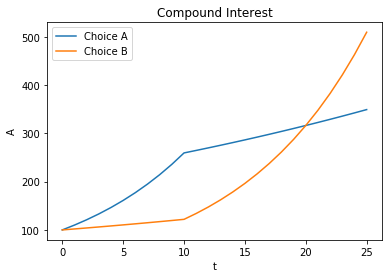

In [18]:
import matplotlib.pyplot as plt
def plotCompoundInterest(P,rates,names):
    #Add a name input to hold our investment choice names
    data = compound(P,rates)
    for A,name in zip(data,names):
        t = list(range(len(A)))
        plt.plot(t,A,label=name)
    plt.xlabel("t")
    plt.ylabel("A")
    plt.title("Compound Interest")
    plt.legend()
    plt.show()
plotCompoundInterest(100,rates,["Choice A","Choice B"])

In [19]:
#They cross at 20 because at that point both the principals have been multiplied by 10% ten times and 2% ten times

In [32]:
#Now, let's say we have a trust fund of 1 million dollars 
#And we want to see what happens as we take out an amount at the beginning of every year: $70,000
P = 1000000
rates = [[.02]*25,[.04]*25,[.06]*25]
withdraw = 70000

In [33]:
def compoundWithdraw(P,rates,withdraw):
    data = []
    for rates_i in rates:
        A = [P-withdraw]
        #Take out money at time 0
        for rate in rates_i:
            value = A[-1]*(rate+1)
            value = max(value-withdraw,0)
            #Withdraw at the beginning of the period, after we have gotten our yearly interest payment
            #Set the max of 0 and this number since we can't go into debt
            A.append(value)
        data.append(A)
    return data
print(compoundWithdraw(P,rates,withdraw))

[[930000, 878600.0, 826172.0, 772695.4400000001, 718149.3488, 662512.335776, 605762.5824915201, 547877.8341413505, 488835.39082417754, 428612.0986406611, 367184.3406134743, 304528.0274257438, 240618.5879742587, 175430.9597337439, 108939.57892841878, 41118.37050698715, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [930000, 897200.0, 863088.0, 827611.52, 790715.9808, 752344.620032, 712438.40483328, 670935.9410266113, 627773.3786676758, 582884.3138143829, 536199.6863669582, 487647.6738216366, 437153.5807745021, 384639.72400548216, 330025.31296570145, 273226.32548432954, 214155.37850370276, 152721.59364385088, 88830.45738960491, 22383.67568518911, 0, 0, 0, 0, 0, 0], [930000, 915800.0, 900748.0, 884792.88, 867880.4528000001, 849953.2799680001, 830950.4767660801, 810807.505372045, 789455.9556943678, 766823.3130360299, 742832.7118181918, 717402.6745272834, 690446.8349989204, 661873.6450988557, 631586.0638047871, 599481.2276330744, 565450.1012910589, 529377.1073685226, 491139.7338106339, 450608.11783927196, 

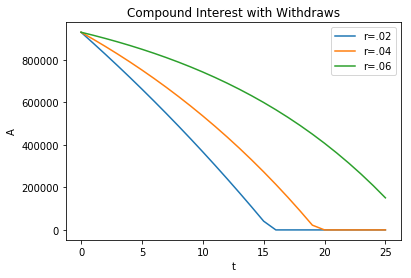

In [35]:
def plotCompoundWithdraw(P,rates,names,withdraw):
    data = compoundWithdraw(P,rates,withdraw)
    for A,name in zip(data,names):
        t = list(range(len(A)))
        plt.plot(t,A,label=name)
    plt.xlabel("t")
    plt.ylabel("A")
    plt.title("Compound Interest with Withdraws")
    plt.legend()
    plt.show()
plotCompoundWithdraw(P,rates,["r=.02","r=.04","r=.06"],withdraw)

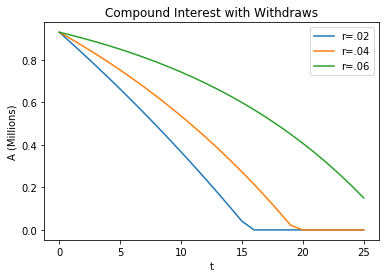

In [39]:
#Let's put a final touch on and make the format of the y label millions
from matplotlib.ticker import FuncFormatter

def millions(y, position):
    #Position does not matter for what we are doing here, but in other cases may be needed
    #Apply int
    s = str(y/1000000)
    return s
formatter = FuncFormatter(millions)

def plotCompoundWithdraw(P,rates,names,withdraw):
    data = compoundWithdraw(P,rates,withdraw)
    for A,name in zip(data,names):
        t = list(range(len(A)))
        plt.plot(t,A,label=name)
    plt.xlabel("t")
    plt.ylabel("A (Millions)")
    plt.title("Compound Interest with Withdraw")
    plt.legend()
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.show()
plotCompoundWithdraw(P,rates,["r=.02","r=.04","r=.06"],withdraw)

In [40]:
#We've done all these examples with annual compounding
#The interest rate only gets multiplied at the end of the year
#There is also other forms of compounding say 6% but you get 3% halfway through and 3% at the end of the year

In [42]:
def annualize(r,periods):
    periodRate = r/periods
    return ((1+periodRate)**periods)-1
for periods in [1,2,4,12]:
    print(periods,annualize(.1,periods))

1 0.10000000000000009
2 0.10250000000000004
4 0.10381289062499954
12 0.10471306744129683


In [46]:
#There is also continious compounding
#t is the time in years, so t=1 is the annualized rate
import math
def continiousCompounding(r,t):
    return math.exp(r*t)-1
print(continiousCompounding(.1,1))

0.10517091807564771


In [47]:
#This does matter!
rates = [[annualize(.1,1)]*25,[annualize(.1,2)]*25,[annualize(.1,4)]*25,[annualize(.1,12)]*25,[continiousCompounding(.1,1)]*25]

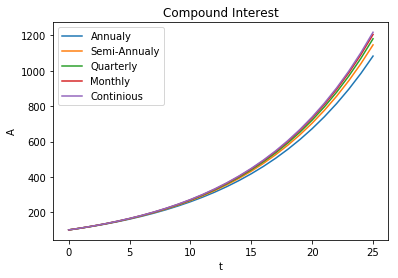

In [48]:
plotCompoundInterest(100,rates,["Annualy","Semi-Annualy","Quarterly","Monthly","Continious"])

In [49]:
cont = math.exp(.1*25)*100
annual = (1.1**25)*100
print(cont-annual)

134.77880173150788


In [54]:
#Can also flip the equation, so what rate do we need to turn 100 to 200 in 5 years?
print((200/100)**(1/5)-1)

0.1486983549970351


In [55]:
(1.1486983549970351)**5*100

200.00000000000009

In [56]:
#Or how much money do we need to put in if we have 5% r but want 200 in 5 years
print(200*1.05**-5)

156.70523329369178


In [57]:
print(156.70523329369178*1.05**5)

200.00000000000003
